# Applying three dimension reduction methodes on MNIST dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
df = pd.read_csv('mnist_train.csv')

In [3]:
# Randomly pick 20000 rows
data_sample = df.sample(10000)

label = data_sample["label"]  # dependent vari
data_x = data_sample.drop(["label"], axis = 1) #independent variable

#### PCA

In [4]:
# Standardising the values
data_std = StandardScaler().fit_transform(data_x.values)

# PCA method with 2 components. 
pca = PCA(n_components=2)
pca_data = pca.fit_transform(data_std)
pca_data = np.vstack((pca_data.T,label)).T

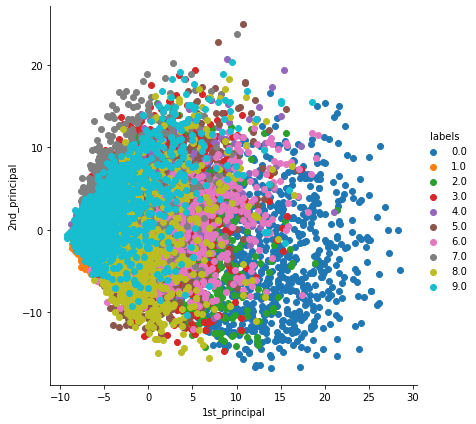

In [5]:
pca_df = pd.DataFrame(data=pca_data,columns=('1st_principal','2nd_principal','labels'))
sn.FacetGrid(pca_df,hue='labels',height=6).map(plt.scatter,'1st_principal','2nd_principal').add_legend()
plt.show()

#### LLE

In [6]:
from sklearn.manifold import LocallyLinearEmbedding as LLE

In [7]:

dr = LLE(n_components=2)
lle_data = dr.fit_transform(data_std)
lle_data = np.vstack((lle_data.T,label)).T


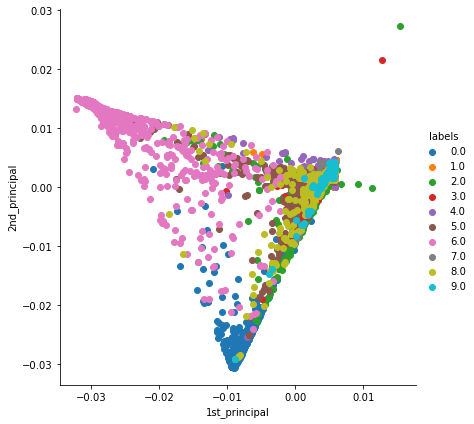

In [8]:

lle_df = pd.DataFrame(data=lle_data,columns=('1st_principal','2nd_principal','labels'))
sn.FacetGrid(lle_df,hue='labels',height=6).map(plt.scatter,'1st_principal','2nd_principal').add_legend()
plt.show()


#### LDA

In [9]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [10]:
lda = LDA(n_components=2)
lda_data = lda.fit(data_std, label).transform(data_std)
lda_data = np.vstack((lda_data.T,label)).T

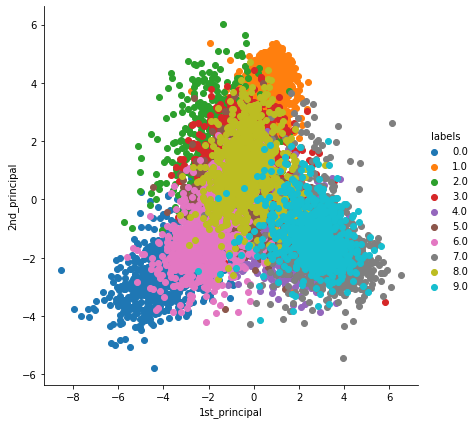

In [11]:
lda_df = pd.DataFrame(data=lda_data,columns=('1st_principal','2nd_principal', 'labels'))
sn.FacetGrid(lda_df,hue='labels', height=6).map(plt.scatter,'1st_principal','2nd_principal').add_legend()
plt.show()

# K-Means

#### CVI

In [12]:
from sklearn.cluster import KMeans

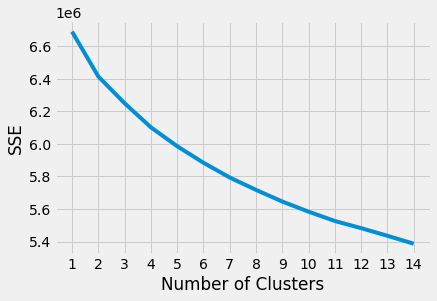

In [13]:
inertias = []

for k in range(1, 15):
    clu = KMeans(n_clusters = k)
    clu.fit_transform(data_std)
    inertias.append(clu.inertia_)

plt.style.use("fivethirtyeight")
plt.plot(range(1, 15), inertias)
plt.xticks(range(1, 15))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [15]:
# Splitting the dataset into the Training set and Test set

X_train, X_test, y_train, y_test = train_test_split(data_x, label, test_size=0.2, random_state=0)

In [16]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [17]:
lda = LDA(n_components=2)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

647.4254410846698


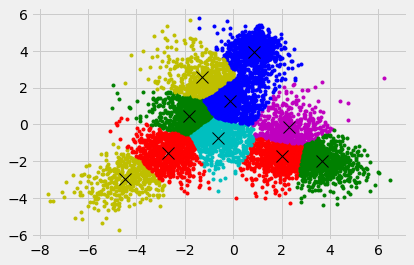

In [60]:
clu = KMeans(n_clusters=10)
clu.fit_predict(X_train, y_train)

centers = clu.cluster_centers_

y = clu.labels_

print(clu.inertia_/clu.n_clusters)

colors = 'rgbycmrgby'

for k in range(clu.n_clusters):
    plt.plot(X_train[y == k, 0], X_train[y == k, 1], colors[k]+'.')
    plt.plot(clu.cluster_centers_[k, 0], clu.cluster_centers_[k, 1], 'kx', markersize=12)


In [67]:
#Accuracy
totalAccuracy = 0
n_clusters=10
for k in range(1, n_clusters+1):
    clusterAccuracy = max(y==k) / sum(y==k) * 100.0
    totalAccuracy += clusterAccuracy

<ipython-input-67-b37317202bd6>:5: RuntimeWarning: invalid value encountered in true_divide
  clusterAccuracy = max(y==k) / sum(y==k) * 100.0
